In [1]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sn
from sklearn.linear_model import LinearRegression
# from sklearn import linear_model
# import statsmodels.api as sm
# import statsmodels.api as sm

In [2]:
cl_path = "CL.csv"
cvx_path = "CVX.csv"
pep_path = "PEP.csv"
pg_path = "PG.csv"
xom_path = "XOM.csv"
sp500_path = "^GSPC.csv"

TXUnemp_path = "TX_Bls.csv"
USUnemp_path = "US_Bls.csv"

#Daily prices trial
# xom2_path = "XOM2.csv"
# cvx2_path = "CVX1.csv"
# pep2_path = "PEP2.csv"

In [3]:
#read and convert files into pd dataframe
#cl_df= pd.read_csv(cl_path, parse_dates =["Date"], index_col="Date")
cl_df= pd.read_csv(cl_path)
cvx_df= pd.read_csv(cvx_path)
pep_df= pd.read_csv(pep_path)
pg_df= pd.read_csv(pg_path)
xom_df= pd.read_csv(xom_path)
sp500_df = pd.read_csv(sp500_path)
TXUnemp_df = pd.read_csv(TXUnemp_path)
USUnemp_df = pd.read_csv(USUnemp_path)

In [4]:
# pep2_df= pd.read_csv(pep2_path)
# cvx2_df= pd.read_csv(cvx2_path)
# xom2_df= pd.read_csv(xom2_path)

In [5]:
TXUnemp_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2010,8.3,8.3,8.3,8.2,8.1,8.0,8.0,8.0,8.1,8.1,8.1,8.1
1,2011,8.0,7.9,7.9,7.9,7.9,7.9,7.9,7.8,7.7,7.6,7.4,7.2
2,2012,7.1,7.0,6.9,6.9,6.9,6.8,6.7,6.6,6.5,6.5,6.5,6.5
3,2013,6.5,6.5,6.5,6.5,6.4,6.3,6.3,6.2,6.1,6.0,5.9,5.8
4,2014,5.7,5.5,5.4,5.3,5.2,5.2,5.1,5.0,4.9,4.8,4.7,4.6
5,2015,4.5,4.4,4.4,4.4,4.4,4.4,4.4,4.4,4.4,4.5,4.5,4.4
6,2016,4.4,4.4,4.4,4.5,4.6,4.7,4.7,4.7,4.8,4.8,4.8,4.8
7,2017,4.7,4.7,4.6,4.5,4.4,4.3,4.2,4.1,4.1,4.1,4.0,4.0
8,2018,4.0,4.0,4.0,4.0,3.9,3.9,3.8,3.7,3.7,3.7,3.7,3.7
9,2019,3.7,3.6,3.5,3.5,3.4,3.4,3.5,3.5,3.5,3.5,3.5,3.5


In [146]:
TXUnemp1_df = TXUnemp_df.transpose()
USUnemp1_df = USUnemp_df.transpose()
TXUnemp1_df

,0,1,2,3,4,5,6,7,8,9
Year,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Jan,8.3,8.0,7.1,6.5,5.7,4.5,4.4,4.7,4.0,3.7
Feb,8.3,7.9,7.0,6.5,5.5,4.4,4.4,4.7,4.0,3.6
Mar,8.3,7.9,6.9,6.5,5.4,4.4,4.4,4.6,4.0,3.5
Apr,8.2,7.9,6.9,6.5,5.3,4.4,4.5,4.5,4.0,3.5
May,8.1,7.9,6.9,6.4,5.2,4.4,4.6,4.4,3.9,3.4
Jun,8.0,7.9,6.8,6.3,5.2,4.4,4.7,4.3,3.9,3.4
Jul,8.0,7.9,6.7,6.3,5.1,4.4,4.7,4.2,3.8,3.5
Aug,8.0,7.8,6.6,6.2,5.0,4.4,4.7,4.1,3.7,3.5
Sep,8.1,7.7,6.5,6.1,4.9,4.4,4.8,4.1,3.7,3.5


In [7]:
TXUnemp1_df.drop(["Year"], inplace = True)
USUnemp1_df.drop(["Year"], inplace = True)

In [8]:
TXUnFin_df = TXUnemp1_df.unstack().reset_index(drop=True)
USUnFin_df = USUnemp1_df.unstack().reset_index(drop=True)

In [107]:
Unemp_df = pd.DataFrame({"US":USUnFin_df,"TX":TXUnFin_df})
Unemp_df

,US,TX
0,9.8,8.3
1,9.8,8.3
2,9.9,8.3
3,9.9,8.2
4,9.6,8.1
...,...,...
115,3.7,3.5
116,3.5,3.5
117,3.6,3.5
118,3.5,3.5


In [109]:
#drop row 0 for returns purposes 
UnEmp1_df = Unemp_df.copy()

#Unemp_df

In [110]:
UnEmp1_df.drop(0, inplace = True)

In [111]:
UnEmp1_df = UnEmp1_df.reset_index()

In [112]:
Unemp_df

,US,TX
0,9.8,8.3
1,9.8,8.3
2,9.9,8.3
3,9.9,8.2
4,9.6,8.1
...,...,...
115,3.7,3.5
116,3.5,3.5
117,3.6,3.5
118,3.5,3.5


In [12]:
UnEmp1_df

,index,US,TX
0,1,9.8,8.3
1,2,9.9,8.3
2,3,9.9,8.2
3,4,9.6,8.1
4,5,9.4,8.0
...,...,...,...
114,115,3.7,3.5
115,116,3.5,3.5
116,117,3.6,3.5
117,118,3.5,3.5


In [13]:
#Change Adj Close column to the ticker symbol of the stock
cl_df = cl_df.rename(columns = {"Adj Close": "CL"})
cvx_df = cvx_df.rename(columns = {"Adj Close": "CVX"})
pep_df = pep_df.rename(columns = {"Adj Close": "PEP"})
pg_df = pg_df.rename(columns = {"Adj Close": "PG"})
xom_df =xom_df.rename(columns = {"Adj Close": "XOM"})
sp500_df =sp500_df.rename(columns = {"Adj Close": "SP500"})

In [14]:
# xom2_df =xom2_df.rename(columns = {"Adj Close": "CL"})
# cvx2_df = cvx2_df.rename(columns = {"Adj Close": "CVX"})
# pep2_df = pep2_df.rename(columns = {"Adj Close": "PEP"})


In [15]:
cvx_df.head()

,Date,Open,High,Low,Close,CVX,Volume
0,2010-01-01,78.199997,81.089996,71.750000,72.120003,48.390926,207150500
1,2010-02-01,72.699997,74.580002,69.550003,72.300003,48.511700,229392800
2,2010-03-01,72.629997,76.139999,72.389999,75.830002,51.367226,215133500
3,2010-04-01,76.400002,83.139999,76.339996,81.440002,55.167446,207104600
4,2010-05-01,81.959999,83.410004,70.800003,73.870003,50.039509,298278800


In [16]:
#filter to only column needed for the analysis
cvx_clean_df = cvx_df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)

In [17]:
# cvx_clean_df.head()

In [18]:
#filter all stocks to only column needed for the analysis
cl_clean_df = cl_df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)
pep_clean_df = pep_df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)
pg_clean_df = pg_df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)
xom_clean_df = xom_df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)
sp500_clean_df = sp500_df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)

In [19]:
# cv2_clean_df = cvx2_df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)
# pep2_clean_df = pep2_df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)
# xom2_clean_df = xom2_df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)

In [20]:
# xom_clean_df.head()

In [21]:
#merge all the df 2 at a time
Tunde_merged_df1 = pd.merge(cvx_clean_df,xom_clean_df, on="Date")

In [22]:
Tunde_merged_df1.head()

,Date,CVX,XOM
0,2010-01-01,48.390926,45.100105
1,2010-02-01,48.511700,45.499088
2,2010-03-01,51.367226,47.190937
3,2010-04-01,55.167446,47.747517
4,2010-05-01,50.039509,42.597256


In [23]:
Tunde_merged_df2 = pd.merge(cl_clean_df,pg_clean_df, on="Date")

In [24]:
Tunde_merged_df3 = pd.merge(Tunde_merged_df1,Tunde_merged_df2, on="Date")

In [25]:
#Tunde_merged_df3.head()

In [26]:
Tunde_merged_df4 = pd.merge(Tunde_merged_df3,sp500_clean_df, on="Date")

In [27]:
Tunde_finalMerged_df = pd.merge(Tunde_merged_df4,pep_clean_df,on="Date")

In [28]:
Tunde_finalMerged_df.head()

,Date,CVX,XOM,CL,PG,SP500,PEP
0,2010-01-01,48.390926,45.100105,28.585510,44.368778,1073.869995,43.419220
1,2010-02-01,48.511700,45.499088,29.957729,45.943375,1104.489990,45.494766
2,2010-03-01,51.367226,47.190937,30.795710,45.936111,1169.430054,48.182087
3,2010-04-01,55.167446,47.747517,30.376711,45.130230,1186.689941,47.834911
4,2010-05-01,50.039509,42.597256,28.563391,44.694584,1089.410034,46.125996


In [29]:
date = Tunde_finalMerged_df["Date"]

In [30]:
#check the length of rows to ensure its 120 months
len(Tunde_finalMerged_df)

120

In [31]:
Tunde_finalMerged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    120 non-null    object 
 1   CVX     120 non-null    float64
 2   XOM     120 non-null    float64
 3   CL      120 non-null    float64
 4   PG      120 non-null    float64
 5   SP500   120 non-null    float64
 6   PEP     120 non-null    float64
dtypes: float64(6), object(1)
memory usage: 7.5+ KB


In [32]:
#Calculate the monthly returns and save to a series, this is the percentage change of current price and previous price
cvx_returns = round(Tunde_finalMerged_df["CVX"].pct_change(),6)
xom_returns = round(Tunde_finalMerged_df["XOM"].pct_change(),2)
cl_returns = round(Tunde_finalMerged_df["CL"].pct_change(),2)
pg_returns = round(Tunde_finalMerged_df["PG"].pct_change(),2)
pep_returns = round(Tunde_finalMerged_df["PEP"].pct_change(),2)
sp500_returns = round(Tunde_finalMerged_df["SP500"].pct_change(),2)

In [33]:
#check to confirm returns confirm accuracy ln(P1/P0)...row 1 should be null
cvx_returns

0           NaN
1      0.002496
2      0.058863
3      0.073981
4     -0.092952
         ...   
115   -0.043782
116    0.017832
117   -0.020742
118    0.008524
119    0.038995
Name: CVX, Length: 120, dtype: float64

In [34]:
#Define date column for inclusion in returns df
dates = Tunde_finalMerged_df["Date"]

In [35]:
#pass the returns into a df
returns_df = pd.DataFrame({"Date":dates,"CVX":cvx_returns,"XOM":xom_returns,"CL":cl_returns,
                          "PG":pg_returns,"PEP":pep_returns, "SP500":sp500_returns})

In [36]:
returns_df.head()

,Date,CVX,XOM,CL,PG,PEP,SP500
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-01,0.002496,0.01,0.05,0.04,0.05,0.03
2,2010-03-01,0.058863,0.04,0.03,-0.00,0.06,0.06
3,2010-04-01,0.073981,0.01,-0.01,-0.02,-0.01,0.01
4,2010-05-01,-0.092952,-0.11,-0.06,-0.01,-0.04,-0.08


In [37]:
#remove rows with null values, should be only the first row
returns_df = returns_df.dropna()

In [38]:
returns_df

,Date,CVX,XOM,CL,PG,PEP,SP500
1,2010-02-01,0.002496,0.01,0.05,0.04,0.05,0.03
2,2010-03-01,0.058863,0.04,0.03,-0.00,0.06,0.06
3,2010-04-01,0.073981,0.01,-0.01,-0.02,-0.01,0.01
4,2010-05-01,-0.092952,-0.11,-0.06,-0.01,-0.04,-0.08
5,2010-06-01,-0.072781,-0.05,0.01,-0.02,-0.03,-0.05
...,...,...,...,...,...,...,...
115,2019-08-01,-0.043782,-0.08,0.04,0.03,0.07,-0.02
116,2019-09-01,0.017832,0.04,-0.01,0.03,0.00,0.02
117,2019-10-01,-0.020742,-0.04,-0.07,0.00,0.01,0.02
118,2019-11-01,0.008524,0.01,-0.01,-0.01,-0.01,0.03


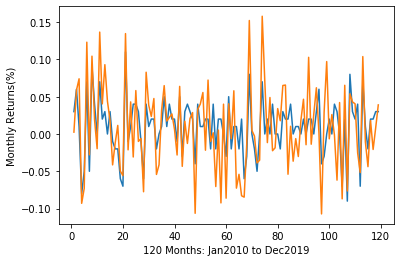

In [39]:
#plot returns for a single stock and sp500
#legend? 
returns_df["SP500"].plot()
returns_df["CVX"].plot()
plt.xlabel("120 Months: Jan2010 to Dec2019")
plt.ylabel("Monthly Returns(%)")
plt.savefig("Images/SingleStockMonthReturns.png")

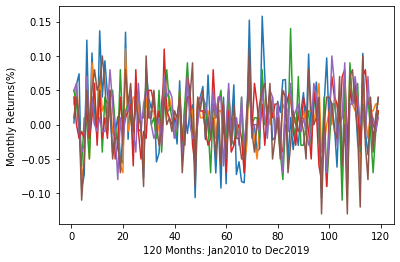

In [40]:
#Plot line plot of all returns to show monthly volatility and how they all swing on average between +-10% monthly 
returns_df["CVX"].plot()
returns_df["SP500"].plot()
returns_df["CL"].plot()
returns_df["PG"].plot()
returns_df["PEP"].plot()
returns_df["XOM"].plot()
plt.xlabel("120 Months: Jan2010 to Dec2019")
plt.ylabel("Monthly Returns(%)")
plt.savefig("Images/MonthReturns.png")

In [41]:
#Calculate the cummulative returns of the stocks over the 10 years period
cvxcumret = (cvx_returns + 1).cumprod()
pepcumret = (pep_returns + 1).cumprod()
xomcumret = (xom_returns +1 ).cumprod()
clcumret = (cl_returns +1 ).cumprod()
pgcumret = (pg_returns +1 ).cumprod()
sp500cumret =(sp500_returns +1 ).cumprod()

In [42]:
round(cvxcumret,5)

0          NaN
1      1.00250
2      1.06151
3      1.14004
4      1.03407
        ...   
115    2.32279
116    2.36421
117    2.31517
118    2.33490
119    2.42595
Name: CVX, Length: 120, dtype: float64

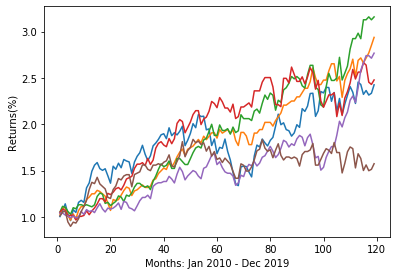

In [43]:
#line plot of the cummulative returns of the stocks 
fig=plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(cvxcumret)
ax1.plot(sp500cumret)
ax1.plot(pepcumret)
ax1.plot(clcumret)
ax1.plot(pgcumret)
ax1.plot(xomcumret)
plt.xlabel("Months: Jan 2010 - Dec 2019")
plt.ylabel("Returns(%)")
plt.savefig("Images/Cummulative.png")

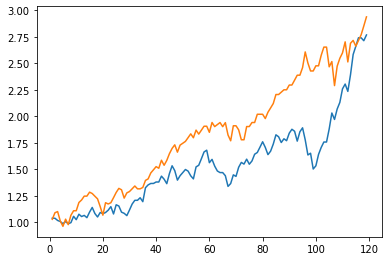

In [44]:
fig=plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(pgcumret)
ax1.plot(sp500cumret)

Text(0, 0.5, 'Monthly Returns(%)')

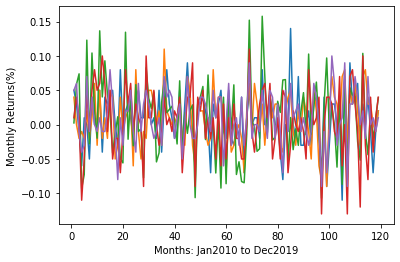

In [45]:
#sample line with CVX and XOM
returns_df["CL"].plot()
returns_df["PG"].plot()
returns_df["CVX"].plot()
returns_df["XOM"].plot()
returns_df["PEP"].plot()


plt.xlabel("Months: Jan2010 to Dec2019")
plt.ylabel("Monthly Returns(%)")

In [46]:
#BarChart = returns_df[["CVX","XOM","CL","PG","PEP"]]

In [47]:
#Bar = BarChart.plot(kind="bar",figsize=(10,5), title="Retunrs 5 stocks",
#                                        color="green", fontsize=12 )

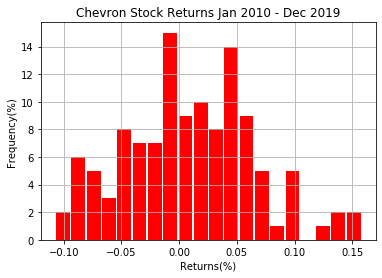

In [48]:
#Show the fluctuation in returns for one asset
#returns_df["XOM"].plot.hist(grid=True, bins=20, rwidth=0.9, color="green")
returns_df["CVX"].plot.hist(grid=True, bins=20, rwidth=0.9, color="red")
plt.title("Chevron Stock Returns Jan 2010 - Dec 2019")
plt.ylabel("Frequency(%)")
plt.xlabel("Returns(%)")
plt.savefig("Images/CVXReturns.png")

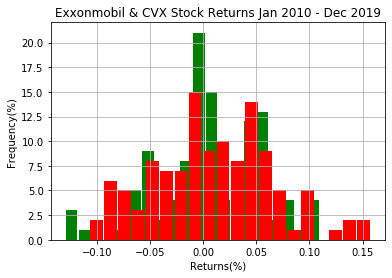

In [49]:
returns_df["XOM"].plot.hist(grid=True, bins=20, rwidth=0.9, color="green")
returns_df["CVX"].plot.hist(grid=True, bins=20, rwidth=0.9, color="red")
plt.title("Exxonmobil & CVX Stock Returns Jan 2010 - Dec 2019")
plt.xlabel("Returns(%)")
plt.ylabel("Frequency(%)")
plt.savefig("Images/XOMReturns.png")

In [50]:
#standard deviations of returns
cvxstd = round(returns_df["CVX"].std(),3)
xomstd = round(returns_df["XOM"].std(),3)
pgstd = round(returns_df["PG"].std(),3)
clstd = round(returns_df["CL"].std(),3)
pepstd = round(returns_df["PEP"].std(),3)
sp500std = round(returns_df["SP500"].std(),3)

In [51]:
#standard deviation of prices 
cvxstdP = round(cvx_clean_df["CVX"].std(),3)
xomstdP= round(xom_clean_df["XOM"].std(),3)
pgstdP = round(pg_clean_df["PG"].std(),3)
clstdP= round(cl_clean_df["CL"].std(),3)
pepstdP = round(pep_clean_df["PEP"].std(),3)
sp500stdP = round(sp500_clean_df["SP500"].std(),3)

In [52]:
stddevR = pd.DataFrame({"CVX":cvxstd,"XOM":xomstd,"PG":pgstd,"CL":clstd,"PEP":pepstd, "SP500":sp500std}, index=[0])
#Error without index "If using all scalar values, you must pass an index"
stddevR

,CVX,XOM,PG,CL,PEP,SP500
0,0.057,0.049,0.039,0.041,0.038,0.036


In [53]:
#pass on std of returns into series for bar chart
#data_stdR = {"CVX": cvxstd,"XOM": xomstd,"PG": pgstd,"CL":clstd,"PEP":pepstd,"SP500":sp500std}
data_stdR = {"CVX": cvxstd,"XOM": xomstd,"PG": pgstd,"CL":clstd,"PEP":pepstd}
Ret_Std = pd.Series(data_stdR)
Ret_Std

CVX    0.057
XOM    0.049
PG     0.039
CL     0.041
PEP    0.038
dtype: float64

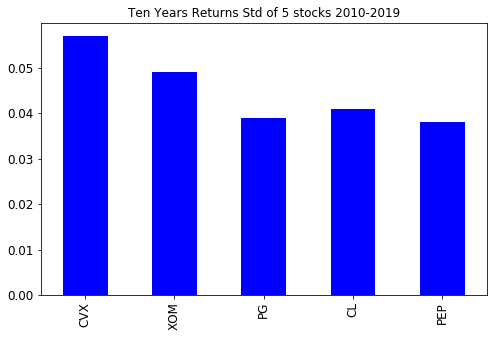

In [54]:
RetStd_Bar = Ret_Std.plot(kind="bar",figsize=(8,5), title="Ten Years Returns Std of 5 stocks 2010-2019",
                                       color="b", fontsize=12 )
plt.savefig("Images/Retstd.png")

In [55]:
#std of prices 
stddevP = pd.DataFrame({"CVX":cvxstdP,"XOM":xomstdP,"PG":pgstdP,"CL":clstdP,"PEP":pepstdP,"SP500":sp500stdP}, index=[0])
#Error without index "If using all scalar values, you must pass an index"
stddevP

,CVX,XOM,PG,CL,PEP,SP500
0,18.088,8.956,18.832,13.781,25.429,593.974


In [56]:
#make a series for std of prices 
#data_stdP = {"CVX": cvxstdP,"XOM": xomstdP,"PG": pgstdP,"CL":clstdP,"PEP":pepstdP,"SP500":sp500stdP}
data_stdP = {"CVX": cvxstdP,"XOM": xomstdP,"PG": pgstdP,"CL":clstdP,"PEP":pepstdP}
Price_Std = pd.Series(data_stdP)
Price_Std

CVX    18.088
XOM     8.956
PG     18.832
CL     13.781
PEP    25.429
dtype: float64

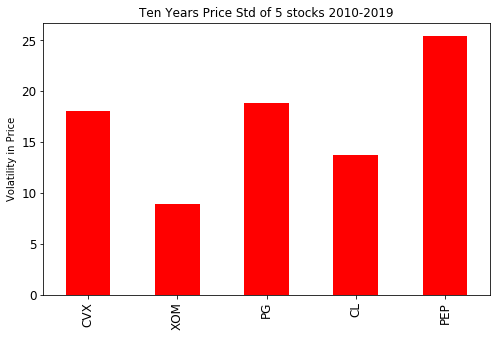

In [57]:
PriceStd_Bar = Price_Std.plot(kind="bar",figsize=(8,5), title="Ten Years Price Std of 5 stocks 2010-2019",
                                       color="red", fontsize=12 )
plt.ylabel("Volatility in Price")
plt.savefig("Images/Pricestd.png")

In [58]:
#Correlation Matrix ...a measure linear relationship between 2 variable..the effect of a change in one 
#variable on the other variable 
CorrelationMat = returns_df[["CVX","XOM","PG","CL","PEP", "SP500"]].corr()
CorrelationMat

,CVX,XOM,PG,CL,PEP,SP500
CVX,1.000000,0.776006,0.259782,0.318158,0.300295,0.687777
XOM,0.776006,1.000000,0.247652,0.298218,0.287862,0.677061
PG,0.259782,0.247652,1.000000,0.554765,0.551315,0.344167
CL,0.318158,0.298218,0.554765,1.000000,0.669013,0.480125
PEP,0.300295,0.287862,0.551315,0.669013,1.000000,0.456676
SP500,0.687777,0.677061,0.344167,0.480125,0.456676,1.000000


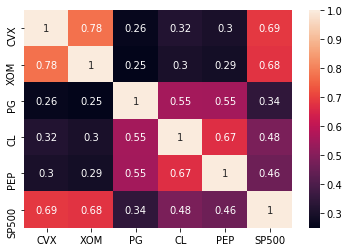

In [59]:
#Corelation matrix visual 
sn.heatmap(CorrelationMat, annot=True)
plt.savefig("Images/CorrMatrix.png")
plt.show()

In [60]:
#Covariance Matrix
# Covariance = returns_df[["CVX","XOM","PG","CL","PEP", "SP500"]].cov()
# Covariance

In [61]:
# #Covariance matrix visual 
# sn.heatmap(Covariance, annot=True)
# plt.show()
# plt.savefig("Images/Covariance.png")

In [62]:
#Perform regression analysis to predict the stocks of 2 stocks with lowest correlation 

In [63]:
cvx_clean_df.head()

,Date,CVX
0,2010-01-01,48.390926
1,2010-02-01,48.511700
2,2010-03-01,51.367226
3,2010-04-01,55.167446
4,2010-05-01,50.039509


In [64]:
cvx_reg_df = (cvx_clean_df.drop(["Date"], axis=1)).reset_index()

In [65]:
# regression1_df = regression_df.rename(columns={"Index","Months"}, inplace=True)
len(cvx_reg_df)

120

The r-squared is: 0.7211201233688641


<function matplotlib.pyplot.show(*args, **kw)>

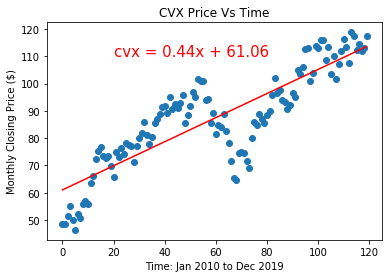

In [66]:
#CVX Regression 
#Define x and y variables for scatter plot
x_values = cvx_reg_df["index"]
y_values = cvx_reg_df["CVX"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "cvx = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,110),fontsize=15,color="red")
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("Monthly Closing Price ($)")
plt.title("CVX Price Vs Time")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/CVX_ScatterPlot.png")
plt.show

In [67]:
CVX_Jan2020 = (0.44*121) + 61.06
CVX_Feb2020 = (0.44*122) + 61.06
print(f"The forcasted monthly closing price of CVX in Jan 2020 is {CVX_Jan2020}")
print(f"The forcasted monthly closing price of CVX in Feb 2020 is {CVX_Feb2020}")

The forcasted monthly closing price of CVX in Jan 2020 is 114.30000000000001
The forcasted monthly closing price of CVX in Feb 2020 is 114.74000000000001


In [68]:
#the actual closing price of CVX in Jan is 104.37
#the actual closing price of CVX in Feb is  90.93...the std of cvx price is +/-18.1

In [69]:
pg_reg_df = (pg_clean_df.drop(["Date"], axis=1)).reset_index()

In [70]:

pg_reg_df.head()

,index,PG
0,0,44.368778
1,1,45.943375
2,2,45.936111
3,3,45.130230
4,4,44.694584


The r-squared is: 0.8344911100716593


<function matplotlib.pyplot.show(*args, **kw)>

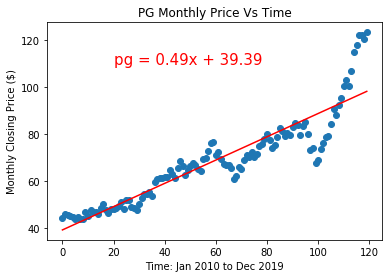

In [71]:
#PEP Regression 
#Define x and y variables for scatter plot
x_values = pg_reg_df["index"]
y_values = pg_reg_df["PG"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "pg = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,110),fontsize=15,color="red")
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("Monthly Closing Price ($)")
plt.title("PG Monthly Price Vs Time")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/PG_ScatterPlot.png")
plt.show

In [72]:
PG_Jan2020 = (0.49*121) + 39.39
PG_Feb2020 = (0.49*122) + 39.39
print(f"The forcasted monthly closing price of PG in Jan 2020 is {PG_Jan2020}")
print(f"The forcasted monthly closing price of PG in Feb 2020 is {PG_Feb2020}")

The forcasted monthly closing price of PG in Jan 2020 is 98.68
The forcasted monthly closing price of PG in Feb 2020 is 99.17


In [73]:
#the actual closing price of PG in Jan is 123.06
#the actual closing price of PG in Feb is  112.48...
#forecasted price for Jan is outside of std 18.83, while Feb is within

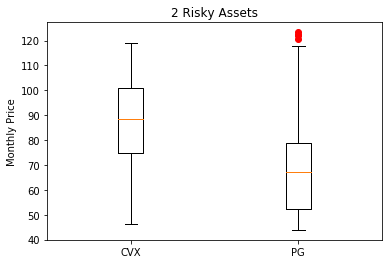

In [74]:
#Are there outliers in the data of the 2 assets due to news especially quaterly reports and dividend payout?
BoxPlot_Data = []
BoxPlot_Data.append(Tunde_finalMerged_df["CVX"])
# BoxPlot_Data.append(Tunde_finalMerged_df["XOM"])
BoxPlot_Data.append(Tunde_finalMerged_df["PG"])
# BoxPlot_Data.append(Tunde_finalMerged_df["CL"])
# BoxPlot_Data.append(Tunde_finalMerged_df["PEP"])
# BoxPlot_Data.append(Tunde_finalMerged_df["SP500"])
Risky_Assets =["CVX","PG"]
fig1, ax1=plt.subplots()
ax1.set_title("2 Risky Assets")
ax1.set_ylabel("Monthly Price")
#plot boxplots and add color to show outliers 
ax1.boxplot(BoxPlot_Data, sym="r")
plt.xticks([1,2], Risky_Assets)
plt.savefig("Images/Boxplots.pdf")
plt.show()

In [75]:
ReturnsReg_df = returns_df.copy()
ReturnsReg_df = (ReturnsReg_df.drop(["Date"], axis=1)).reset_index()
ReturnsReg_df.head()

,index,CVX,XOM,CL,PG,PEP,SP500
0,1,0.002496,0.01,0.05,0.04,0.05,0.03
1,2,0.058863,0.04,0.03,-0.00,0.06,0.06
2,3,0.073981,0.01,-0.01,-0.02,-0.01,0.01
3,4,-0.092952,-0.11,-0.06,-0.01,-0.04,-0.08
4,5,-0.072781,-0.05,0.01,-0.02,-0.03,-0.05


In [76]:
def f_regression(x_values,y_values,i,j):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,6)) + "x + " + str(round(intercept,6))
    a= plt.scatter(x_values,y_values)
    b= plt.plot(x_values,regress_values,"r-")
    c= print(f"The r-squared is: {rvalue**2}")
    d= plt.annotate(line_eq, (i,j),fontsize=15,color="red")
    return (a,b,c,d)

The r-squared is: 0.004621634221241688


<function matplotlib.pyplot.show(*args, **kw)>

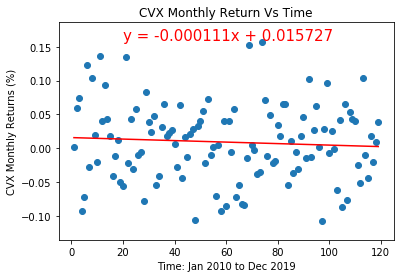

In [129]:
f_regression(ReturnsReg_df["index"], ReturnsReg_df["CVX"],20,0.16)
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("CVX Monthly Returns (%)")
plt.title("CVX Monthly Return Vs Time")
# print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/CVXRet_ScatterPlot.png")
plt.show

In [78]:
CVXRet_Jan2020 = round((0.000111*121) + 0.015727,4)
CVXRet_Feb2020 = round((0.000111*122) + 0.015727,4)
CVXRet_Dec2020 = round((0.000111*132) + 0.015727,4)
print(f"The forcasted return of CVX by end of Jan 2020 is {CVXRet_Jan2020}")
print(f"The forcasted return of CVX by end of Feb 2020 is {CVXRet_Feb2020}")
print(f"The forcasted return of CVX by end of Dec 2020 is {CVXRet_Dec2020}")

The forcasted return of CVX by end of Jan 2020 is 0.0292
The forcasted return of CVX by end of Feb 2020 is 0.0293
The forcasted return of CVX by end of Dec 2020 is 0.0304


In [79]:
#pass the Cumreturns into a df
CumReturns_df = pd.DataFrame({"Date":dates,"CVX":cvxcumret,"XOM":xomcumret,"CL":clcumret,
                          "PG":pgcumret,"PEP":pepcumret, "SP500":sp500cumret})

In [80]:
CumRet_df= CumReturns_df.dropna()


In [81]:
CumRet_df.head()

,Date,CVX,XOM,CL,PG,PEP,SP500
1,2010-02-01,1.002496,1.010000,1.050000,1.040000,1.050000,1.030000
2,2010-03-01,1.061506,1.050400,1.081500,1.040000,1.113000,1.091800
3,2010-04-01,1.140037,1.060904,1.070685,1.019200,1.101870,1.102718
4,2010-05-01,1.034068,0.944205,1.006444,1.009008,1.057795,1.014501
5,2010-06-01,0.958808,0.896994,1.016508,0.988828,1.026061,0.963776


In [82]:
CumRet_reg_df = (CumRet_df.drop(["Date"], axis=1)).reset_index()
CumRet_reg_df

,index,CVX,XOM,CL,PG,PEP,SP500
0,1,1.002496,1.010000,1.050000,1.040000,1.050000,1.030000
1,2,1.061506,1.050400,1.081500,1.040000,1.113000,1.091800
2,3,1.140037,1.060904,1.070685,1.019200,1.101870,1.102718
3,4,1.034068,0.944205,1.006444,1.009008,1.057795,1.014501
4,5,0.958808,0.896994,1.016508,0.988828,1.026061,0.963776
...,...,...,...,...,...,...,...
114,115,2.322787,1.500213,2.665876,2.661130,3.128552,2.661996
115,116,2.364207,1.560221,2.639217,2.740964,3.128552,2.715236
116,117,2.315169,1.497812,2.454472,2.740964,3.159838,2.769540
117,118,2.334903,1.512791,2.429927,2.713555,3.128239,2.852627


The r-squared is: 0.714152625569932


<function matplotlib.pyplot.show(*args, **kw)>

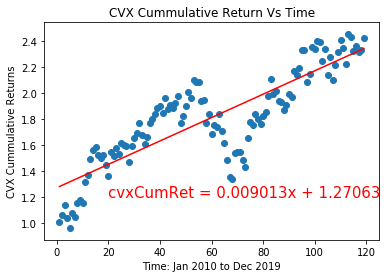

In [83]:
x_values =CumRet_reg_df["index"]
y_values = CumRet_reg_df["CVX"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "cvxCumRet = " + str(round(slope,6)) + "x + " + str(round(intercept,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,1.2),fontsize=15,color="red")
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("CVX Cummulative Returns")
plt.title("CVX Cummulative Return Vs Time")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/CVXCumRet_ScatterPlot.png")
plt.show

In [84]:
CVX_CR_12months = (0.009013*12) + 1.27063
CVX_CR_24months = (0.009013*24) + 1.27063
CVX_CR_60months = (0.009013*60) + 1.27063

print(f"The forcasted cummulative return of CVX by end of 12 months holding is {CVX_CR_12months}")
print(f"The forcasted cummulative return of CVX by end of 12 months holding is {CVX_CR_24months}")
print(f"The forcasted cummulative return of CVX by end of 12 months holding is {CVX_CR_60months}")

The forcasted cummulative return of CVX by end of 12 months holding is 1.3787859999999998
The forcasted cummulative return of CVX by end of 12 months holding is 1.486942
The forcasted cummulative return of CVX by end of 12 months holding is 1.81141


In [86]:
CumRet_MulReg = pd.merge(UnEmp1_df,CumRet_reg_df, on="index")

In [87]:
CumRet_MulReg.head()

,index,US,TX,CVX,XOM,CL,PG,PEP,SP500
0,1,9.8,8.3,1.002496,1.010000,1.050000,1.040000,1.050000,1.030000
1,2,9.9,8.3,1.061506,1.050400,1.081500,1.040000,1.113000,1.091800
2,3,9.9,8.2,1.140037,1.060904,1.070685,1.019200,1.101870,1.102718
3,4,9.6,8.1,1.034068,0.944205,1.006444,1.009008,1.057795,1.014501
4,5,9.4,8.0,0.958808,0.896994,1.016508,0.988828,1.026061,0.963776


In [88]:
y = CumRet_MulReg["CVX"]
x = CumRet_MulReg[["index","US"]]
linear_regression = LinearRegression()
linear_regression.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
y_pred =linear_regression.predict(x)
#y_pred

In [90]:
Coefficients = linear_regression.coef_
Coefficients

array([0.01791146, 0.15249261])

In [91]:
Intercepts = linear_regression.intercept_
Intercepts

-0.20693857487707157

The r-squared is: 0.6463075189290788


<function matplotlib.pyplot.show(*args, **kw)>

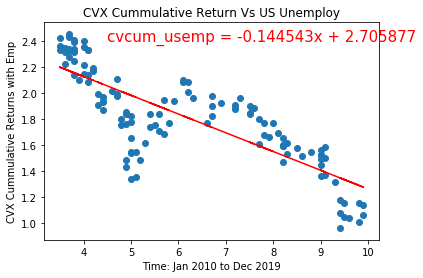

In [92]:
x_values =CumRet_MulReg["US"]
y_values = CumRet_MulReg["CVX"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "cvcum_usemp = " + str(round(slope,6)) + "x + " + str(round(intercept,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (4.5,2.4),fontsize=15,color="red")
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("CVX Cummulative Returns with Emp")
plt.title("CVX Cummulative Return Vs US Unemploy")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/CVXCumUSemp_ScatterPlot.png")
plt.show

The r-squared is: 0.6288135271943884


<function matplotlib.pyplot.show(*args, **kw)>

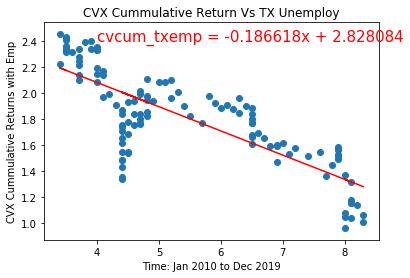

In [93]:
x_values =CumRet_MulReg["TX"]
y_values = CumRet_MulReg["CVX"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "cvcum_txemp = " + str(round(slope,6)) + "x + " + str(round(intercept,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (4,2.4),fontsize=15,color="red")
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("CVX Cummulative Returns with Emp")
plt.title("CVX Cummulative Return Vs TX Unemploy")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/CVXCumTXemp_ScatterPlot.png")
plt.show

In [94]:
PriOnly_df = (Tunde_finalMerged_df.drop(["Date"], axis=1)).reset_index()
PriOnly_df.head()

,index,CVX,XOM,CL,PG,SP500,PEP
0,0,48.390926,45.100105,28.585510,44.368778,1073.869995,43.419220
1,1,48.511700,45.499088,29.957729,45.943375,1104.489990,45.494766
2,2,51.367226,47.190937,30.795710,45.936111,1169.430054,48.182087
3,3,55.167446,47.747517,30.376711,45.130230,1186.689941,47.834911
4,4,50.039509,42.597256,28.563391,44.694584,1089.410034,46.125996


In [95]:
PriOnly_df

,index,CVX,XOM,CL,PG,SP500,PEP
0,0,48.390926,45.100105,28.585510,44.368778,1073.869995,43.419220
1,1,48.511700,45.499088,29.957729,45.943375,1104.489990,45.494766
2,2,51.367226,47.190937,30.795710,45.936111,1169.430054,48.182087
3,3,55.167446,47.747517,30.376711,45.130230,1186.689941,47.834911
4,4,50.039509,42.597256,28.563391,44.694584,1089.410034,46.125996
...,...,...,...,...,...,...,...
115,115,112.402039,64.633873,72.796333,117.974602,2926.459961,132.911026
116,116,114.406403,67.472893,72.168015,122.046753,2976.739990,133.270691
117,117,112.033386,64.567955,67.347649,122.174316,3037.560059,134.260178
118,118,112.988373,65.103073,67.003723,120.535347,3140.979980,132.948608


In [119]:
Unemp_df["index"]=Unemp_df.index
Unemp_df = Unemp_df[["index","US","TX"]]

In [120]:
Unemp_df

,index,US,TX
0,0,9.8,8.3
1,1,9.8,8.3
2,2,9.9,8.3
3,3,9.9,8.2
4,4,9.6,8.1
...,...,...,...
115,115,3.7,3.5
116,116,3.5,3.5
117,117,3.6,3.5
118,118,3.5,3.5


In [148]:
PriAndUnem_df = pd.merge(Unemp_df,PriOnly_df, on="index")

In [150]:
PriAndUnem_df= PriAndUnem_df.rename(columns={"index":"Time","US":"US_Unemp","TX":"TX_Unemp"})

PriAndUnem_df


,Time,US_Unemp,TX_Unemp,CVX,XOM,CL,PG,SP500,PEP
0,0,9.8,8.3,48.390926,45.100105,28.585510,44.368778,1073.869995,43.419220
1,1,9.8,8.3,48.511700,45.499088,29.957729,45.943375,1104.489990,45.494766
2,2,9.9,8.3,51.367226,47.190937,30.795710,45.936111,1169.430054,48.182087
3,3,9.9,8.2,55.167446,47.747517,30.376711,45.130230,1186.689941,47.834911
4,4,9.6,8.1,50.039509,42.597256,28.563391,44.694584,1089.410034,46.125996
...,...,...,...,...,...,...,...,...,...
115,115,3.7,3.5,112.402039,64.633873,72.796333,117.974602,2926.459961,132.911026
116,116,3.5,3.5,114.406403,67.472893,72.168015,122.046753,2976.739990,133.270691
117,117,3.6,3.5,112.033386,64.567955,67.347649,122.174316,3037.560059,134.260178
118,118,3.5,3.5,112.988373,65.103073,67.003723,120.535347,3140.979980,132.948608


The r-squared is: 0.6553337700976753


<function matplotlib.pyplot.show(*args, **kw)>

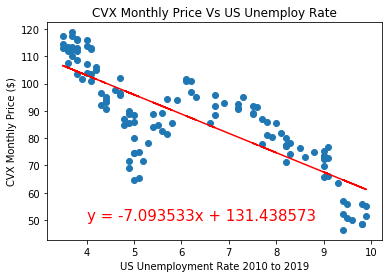

In [130]:
f_regression(PriAndUnem_df["US_Unemp"], PriAndUnem_df["CVX"],4,50)
plt.xlabel("US Unemployment Rate 2010 to 2019")
plt.ylabel("CVX Monthly Price ($)")
plt.title("CVX Monthly Price Vs US Unemploy Rate")
# print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/CVXPrice_USuemp_ScatterPlot.png")
plt.show

In [138]:
cvx_price_time_usemp = LinearRegression()
cvx_price_time_usemp.fit(PriAndUnem_df[["Time", "US_Unemp"]], PriAndUnem_df["CVX"])
print(cvx_price_time_usemp.intercept_)
print(cvx_price_time_usemp.coef_)

-9.567894331153013
[0.86705591 7.28598621]


In [144]:
Jan = -9.568 + (0.867*121) + (7.286*0.036)
Feb = -9.568 + (0.867*122) + (7.286*0.035)

In [145]:
print(f"{Jan}")
print(f"{Feb}")

95.601296
96.46101
